In [1]:
import numpy as np
import os
import sys
sys.path.append('../')
import cv2
from utils import load_datasets
from copy import deepcopy
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from keras.api.models import Model
from keras.api.layers import Dense, Conv2D, BatchNormalization, LeakyReLU, Flatten, Softmax, Activation, MaxPool2D, Input, Dropout
from keras.api.optimizers import Adam
from keras.api.losses import binary_crossentropy
from keras.api.utils import to_categorical

In [5]:
datasets_dir = '../datasets/Movies'
multi_class = False
new_shape = (270, 460)

In [6]:
train_total_size = 0
test_total_size = 0
if multi_class:
    for folder in os.listdir(datasets_dir):
        if folder.endswith('01'):
            train_total_size  += len(os.listdir(os.path.join(datasets_dir, folder)))
        elif folder.endswith('02'):
            test_total_size += len(os.listdir(os.path.join(datasets_dir, folder)))      
else:
    for folder in os.listdir(datasets_dir)[:4]:
        if folder.endswith('01'):
            train_total_size  += len(os.listdir(os.path.join(datasets_dir, folder)))
        elif folder.endswith('02'):
            test_total_size += len(os.listdir(os.path.join(datasets_dir, folder)))

In [18]:
ds01 = np.empty(shape=(train_total_size, new_shape[0], new_shape[1], 3), dtype=np.float32)
ds02 = np.empty(shape=(test_total_size, new_shape[0], new_shape[1], 3), dtype=np.float32)
y_01 = np.empty(shape=(train_total_size, 1))
y_02 = np.empty(shape=(test_total_size, 1))

In [19]:
idx_01 = 0
idx_02 = 0
y01_class = 0
y02_class = 0

folders = os.listdir(datasets_dir) if multi_class else os.listdir(datasets_dir)[:4]

for folder in folders:
    len_folder = len(os.listdir(os.path.join(datasets_dir, folder)))  
    if folder.endswith('01'):
        for i, file in enumerate(os.listdir(os.path.join(datasets_dir, folder))):
            ds01[i+idx_01] = cv2.resize(cv2.imread(os.path.join(datasets_dir, folder, file)) / 255.0, new_shape[::-1])
            y_01[i+idx_01] = y01_class
        idx_01 += len_folder
        y01_class += 1
        
    if folder.endswith('02'):
        for file in os.listdir(os.path.join(datasets_dir, folder)):
            ds02[idx_02] = cv2.resize(cv2.imread(os.path.join(datasets_dir, folder, file)) / 255.0, new_shape[::-1])
            y_02[idx_02] = y02_class
            idx_02 += 1
        y02_class += 1

x


In [26]:
ds01, y_01 = shuffle(ds01, y_01)
ds02, y_02 = shuffle(ds02, y_02)

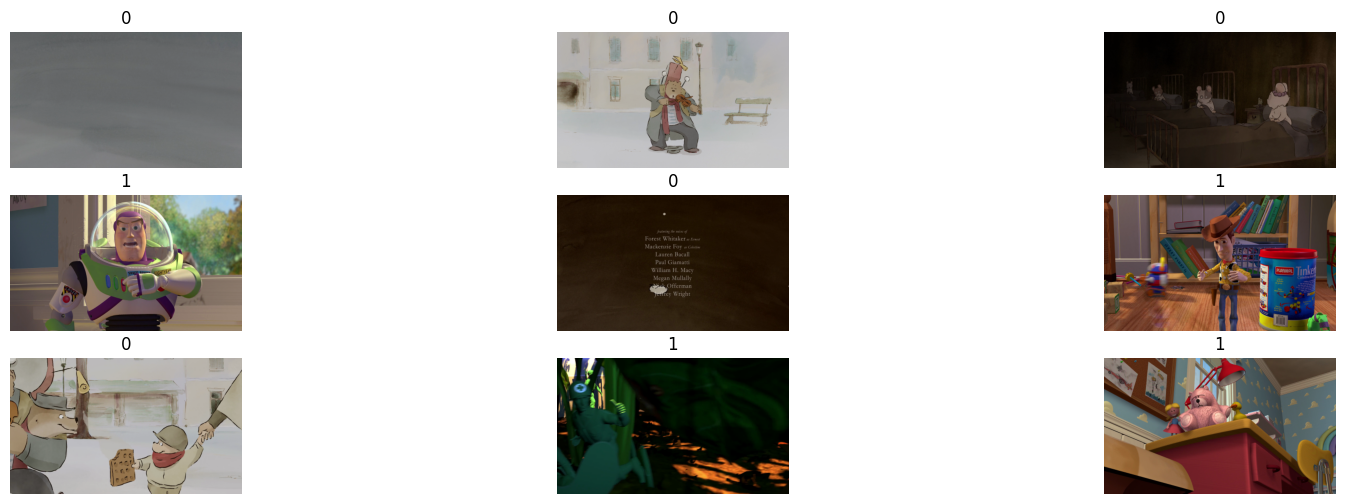

In [31]:
ind = np.random.permutation(ds01.shape[0])
plt.figure(figsize=(20,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(ds01[i, :, :, ::-1]), plt.title(f'{int(y_01[i][0])}'), plt.axis('off')

In [29]:
cv2.imshow('', ds01[-1])
cv2.waitKey(0)
cv2.destroyAllWindows()